In [1]:
from tcsim.system import*
from tcsim.visualization import*
from tcsim.gates import*
from scipy import optimize
from qutip import*
import random

In [53]:
X = (a.dag()+a)/2
P = (1j*(a.dag()-a))/2

def calc_squeez_parameter(dB):
    return np.log(10**(dB/10))/2

def hastrup_three_steps(uvs):
    alpha = 1.8
    cat = (coherent(N,alpha) - coherent(N,-alpha)).unit()
    cat_tensor = tensor(fock(2,0),cat)
    
    
    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]
    u_3 = uvs[4]
    v_3 = uvs[5]

    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*vac
    psi2 = V_ideal_operator(v_2)*U_ideal_operator(u_2)*psi1
    psi3 = V_ideal_operator(v_3)*U_ideal_operator(u_3)*psi2
    return psi3

def hastrup_four_steps(uvs):
    
    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]
    u_3 = uvs[4]
    v_3 = uvs[5]
    u_4 = uvs[6]
    v_4 = uvs[7]

    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*vac
    psi2 = V_ideal_operator(v_2)*U_ideal_operator(u_2)*psi1
    psi3 = V_ideal_operator(v_3)*U_ideal_operator(u_3)*psi2
    psi4 = V_ideal_operator(v_4)*U_ideal_operator(u_4)*psi3
    return psi4

def overlap(uvs, wanted_state):
    
    #state = hastrup_three_steps(uvs)
    state = hastrup_four_steps(uvs)
    
    print(np.abs((1-state.overlap(wanted_state))*np.conjugate((1-state.overlap(wanted_state)))) )
    return np.abs((1-state.overlap(wanted_state))*np.conjugate((1-state.overlap(wanted_state)))) 

def find_opt_parameters(wanted_state):
   
    initial_guess = [random.randrange(-10, 10, 1)/10 for i in range(8)]
    #initial_guess = [ 0.05042415, -0.36024377,  1.02733798,  0.54345306, -0.53510295,-0.06212451]
    
    bounds = [(-2,2), (-2,2),(-2,2),(-2,2),(-2,2),(-2,2), (-2,2),(-2,2)]
    #bounds = [(-2,2), (-2,2),(-2,2),(-2,2),(-2,2),(-2,2)]
    result = optimize.minimize(fun=overlap, x0=initial_guess, args = (wanted_state), bounds=bounds, method='SLSQP',  )
    if result.success:
        fitted_params = result.x
        print(fitted_params)
    return fitted_params




In [54]:

dBs = [3,5, 6, 7]

# first cat, then squeeze
states2 = [squeeze(N,calc_squeez_parameter(i))for i in dBs]*fock(N,0)

In [57]:

wanted_state = states2[1]
wanted_state_tensor = tensor(fock(2,0),wanted_state)
params = []
for i in range(5):
    print(i)
    params.append(find_opt_parameters(wanted_state_tensor)) 

0
0.00610569901120157
0.006105699157202767
0.006105698933236234
0.006105698726779628
0.00610569901194845
0.00610569865934954
0.006105698903275237
0.00610569895737083
0.00610569885200572
0.005014552982041901
0.005014553125643065
0.00501455293728737
0.005014552755519164
0.0050145529956937395
0.005014552709906919
0.005014552900227591
0.005014552978049278
0.0050145528537402706
0.0025473259665789506
0.0025473260781408843
0.0025473259891216978
0.002547325885670378
0.0025473260024838945
0.00254732589620014
0.002547325947707424
0.0025473260781995184
0.002547325918962283
0.0018749718584538926
0.0018749719467246893
0.0018749718925443136
0.0018749718237096983
0.0018749718959022044
0.0018749718533720308
0.0018749718579911447
0.0018749720018155142
0.0018749718381705384
0.0014235631827910192
0.0014235632464440339
0.0014235632168226066
0.0014235631785211448
0.0014235632168416324
0.0014235632217476314
0.0014235631933076714
0.0014235633406090103
0.001423563182008971
0.0010790548731380786
0.001079054914

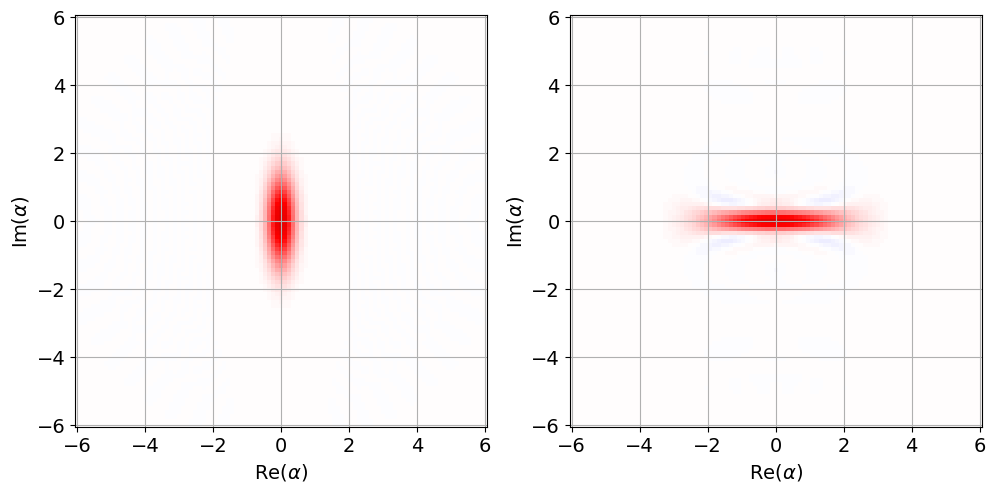

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [69]:
from tcsim.visualization import plot_wigner
uvs = params[1]
uvs = [-0.84571552,  0.61335235,  2.63648988,  0.30560449, -0.91694799, -0.80353261]
state = hastrup_three_steps(uvs)

fig, axs = plt.subplots(1,2)
plot_wigner(states2[1], ax = axs[0], max_alpha = 6, npts = 101)

plot_wigner(state, ax = axs[1], max_alpha = 6, npts = 101)


Plot X and Y Prob distribution of each state.

In [41]:
def hastrup_three_steps(uvs):
    
    u_1 = uvs[0]
    v_1 = uvs[1]
    u_2 = uvs[2]
    v_2 = uvs[3]
    u_3 = uvs[4]
    v_3 = uvs[5]
    u_4 = uvs[6]
    v_4 = uvs[7]

    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*vac
    psi2 = V_ideal_operator(v_2)*U_ideal_operator(u_2)*psi1
    psi3 = V_ideal_operator(v_3)*U_ideal_operator(u_3)*psi2
    psi4 = V_ideal_operator(v_4)*U_ideal_operator(u_4)*psi3
    return psi1,psi2,psi3,psi4

def xp_cut(state, xvec):
    W = qt.wigner(qt.ptrace(state,1),xvec,xvec)
    p_cut = W[:,int(len(xvec)/2)]
    x_cut = W[int(len(xvec)/2),:]
    return p_cut, x_cut 
    

In [43]:
psis = hastrup_three_steps(params[0])

In [45]:
xvec = np.linspace(-5,5,100)
p, x = xp_cut(psis[1], xvec)
plt.plot(xvec,p)
plt.plot(xvec,x)



TypeError: Input is not a quantum object

In [19]:
from scipy.integrate import quad
xvec = np.linspace(0, 4, 40)
# quad integrates over the first argument of the passed function.
def integrandx(x, y):
    return qt.wigner(qt.ptrace(psi,1), x, y)
def integrandy(y, x):
    return qt.wigner(qt.ptrace(psi,1), x, y)

0.0 done
0.10256410256410256 done
0.20512820512820512 done
0.3076923076923077 done
0.41025641025641024 done
0.5128205128205128 done
0.6153846153846154 done
0.717948717948718 done
0.8205128205128205 done
0.923076923076923 done
1.0256410256410255 done
1.1282051282051282 done
1.2307692307692308 done
1.3333333333333333 done
1.435897435897436 done
1.5384615384615383 done
1.641025641025641 done
1.7435897435897436 done
1.846153846153846 done
1.9487179487179487 done
2.051282051282051 done
2.1538461538461537 done
2.2564102564102564 done
2.358974358974359 done
2.4615384615384617 done
2.564102564102564 done
2.6666666666666665 done
2.769230769230769 done
2.871794871794872 done
2.9743589743589745 done
3.0769230769230766 done
3.1794871794871793 done
3.282051282051282 done
3.3846153846153846 done
3.4871794871794872 done
3.5897435897435894 done
3.692307692307692 done
3.7948717948717947 done
3.8974358974358974 done
4.0 done
0.0 done
0.10256410256410256 done
0.20512820512820512 done
0.3076923076923077 d

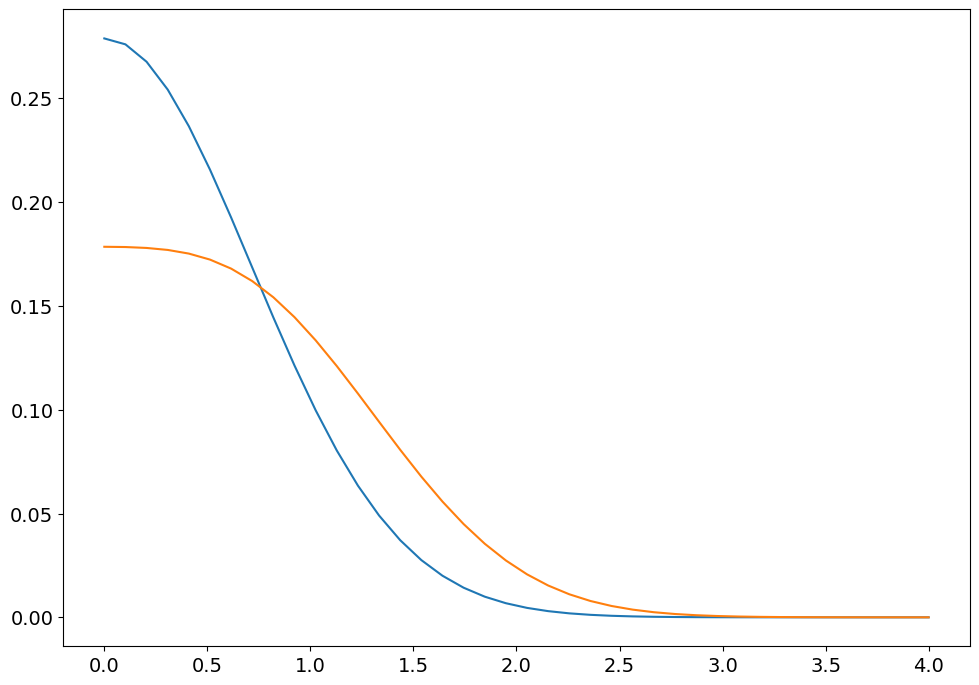

In [20]:
psi = psis[0]

prx0 = []
for x in xvec:
    prx0.append(quad(integrandy, 0, 3, args=(x))[0])
    print(x, "done")

plt.plot(xvec, prx0 )


pry0 = []
for y in xvec:
    pry0.append(quad(integrandx, 0, 3, args=(y))[0])
    print(y, "done")

plt.plot(xvec, pry0 )

0.0 done
0.10256410256410256 done
0.20512820512820512 done
0.3076923076923077 done
0.41025641025641024 done
0.5128205128205128 done
0.6153846153846154 done
0.717948717948718 done
0.8205128205128205 done
0.923076923076923 done
1.0256410256410255 done
1.1282051282051282 done
1.2307692307692308 done
1.3333333333333333 done
1.435897435897436 done
1.5384615384615383 done
1.641025641025641 done
1.7435897435897436 done
1.846153846153846 done
1.9487179487179487 done
2.051282051282051 done
2.1538461538461537 done
2.2564102564102564 done
2.358974358974359 done
2.4615384615384617 done
2.564102564102564 done
2.6666666666666665 done
2.769230769230769 done
2.871794871794872 done
2.9743589743589745 done
3.0769230769230766 done
3.1794871794871793 done
3.282051282051282 done
3.3846153846153846 done
3.4871794871794872 done
3.5897435897435894 done
3.692307692307692 done
3.7948717948717947 done
3.8974358974358974 done
4.0 done
0.0 done
0.10256410256410256 done
0.20512820512820512 done
0.3076923076923077 d

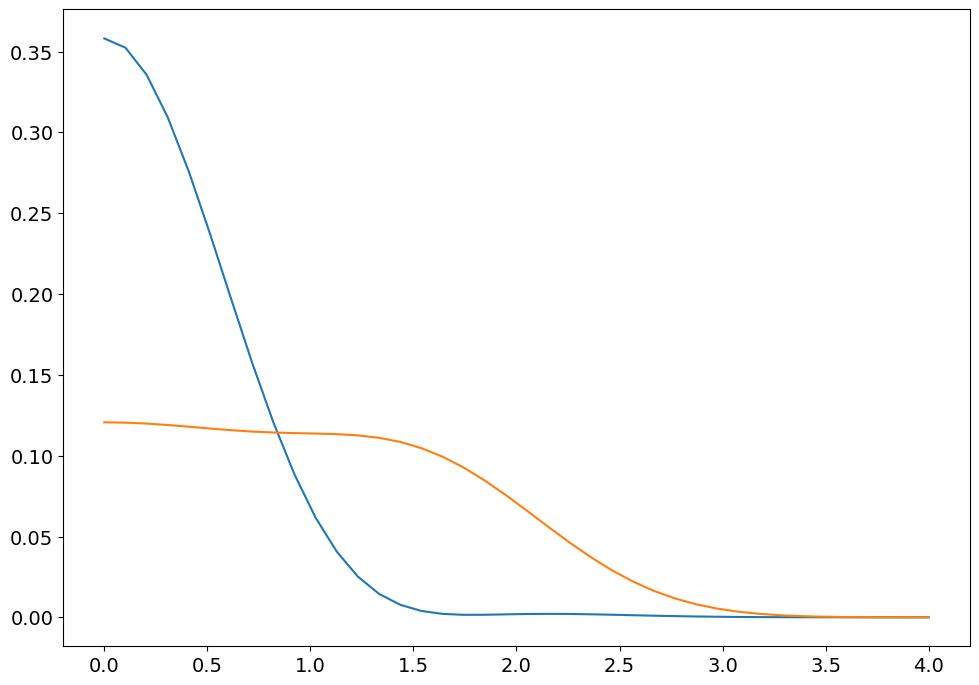

In [21]:
psi = psis[1]

prx0 = []
for x in xvec:
    prx0.append(quad(integrandy, 0, 3, args=(x))[0])
    print(x, "done")

plt.plot(xvec, prx0 )


pry0 = []
for y in xvec:
    pry0.append(quad(integrandx, 0, 3, args=(y))[0])
    print(y, "done")

plt.plot(xvec, pry0 )

0.0 done
0.10256410256410256 done
0.20512820512820512 done
0.3076923076923077 done
0.41025641025641024 done
0.5128205128205128 done
0.6153846153846154 done
0.717948717948718 done
0.8205128205128205 done
0.923076923076923 done
1.0256410256410255 done
1.1282051282051282 done
1.2307692307692308 done
1.3333333333333333 done
1.435897435897436 done
1.5384615384615383 done
1.641025641025641 done
1.7435897435897436 done
1.846153846153846 done
1.9487179487179487 done
2.051282051282051 done
2.1538461538461537 done
2.2564102564102564 done
2.358974358974359 done
2.4615384615384617 done
2.564102564102564 done
2.6666666666666665 done
2.769230769230769 done
2.871794871794872 done
2.9743589743589745 done
3.0769230769230766 done
3.1794871794871793 done
3.282051282051282 done
3.3846153846153846 done
3.4871794871794872 done
3.5897435897435894 done
3.692307692307692 done
3.7948717948717947 done
3.8974358974358974 done
4.0 done
0.0 done
0.10256410256410256 done
0.20512820512820512 done
0.3076923076923077 d

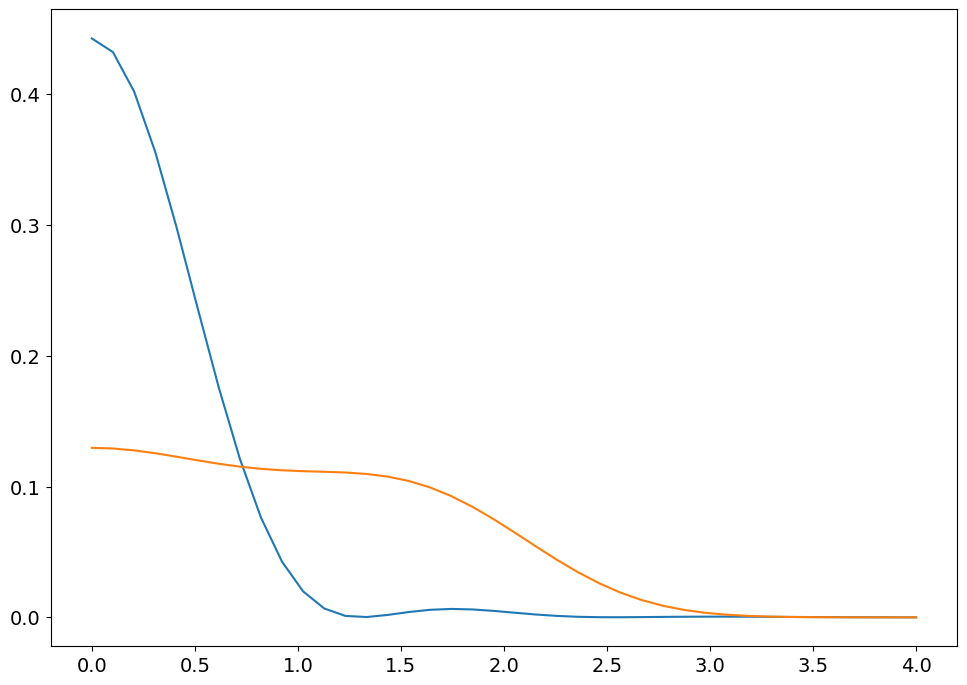

In [22]:
psi = psis[2]

prx0 = []
for x in xvec:
    prx0.append(quad(integrandy, 0, 3, args=(x))[0])
    print(x, "done")

plt.plot(xvec, prx0 )


pry0 = []
for y in xvec:
    pry0.append(quad(integrandx, 0, 3, args=(y))[0])
    print(y, "done")

plt.plot(xvec, pry0 )

0.0 done
0.10256410256410256 done
0.20512820512820512 done
0.3076923076923077 done
0.41025641025641024 done
0.5128205128205128 done
0.6153846153846154 done
0.717948717948718 done
0.8205128205128205 done
0.923076923076923 done
1.0256410256410255 done
1.1282051282051282 done
1.2307692307692308 done
1.3333333333333333 done
1.435897435897436 done
1.5384615384615383 done
1.641025641025641 done
1.7435897435897436 done
1.846153846153846 done
1.9487179487179487 done
2.051282051282051 done
2.1538461538461537 done
2.2564102564102564 done
2.358974358974359 done
2.4615384615384617 done
2.564102564102564 done
2.6666666666666665 done
2.769230769230769 done
2.871794871794872 done
2.9743589743589745 done
3.0769230769230766 done
3.1794871794871793 done
3.282051282051282 done
3.3846153846153846 done
3.4871794871794872 done
3.5897435897435894 done
3.692307692307692 done
3.7948717948717947 done
3.8974358974358974 done
4.0 done
0.0 done
0.10256410256410256 done
0.20512820512820512 done
0.3076923076923077 d

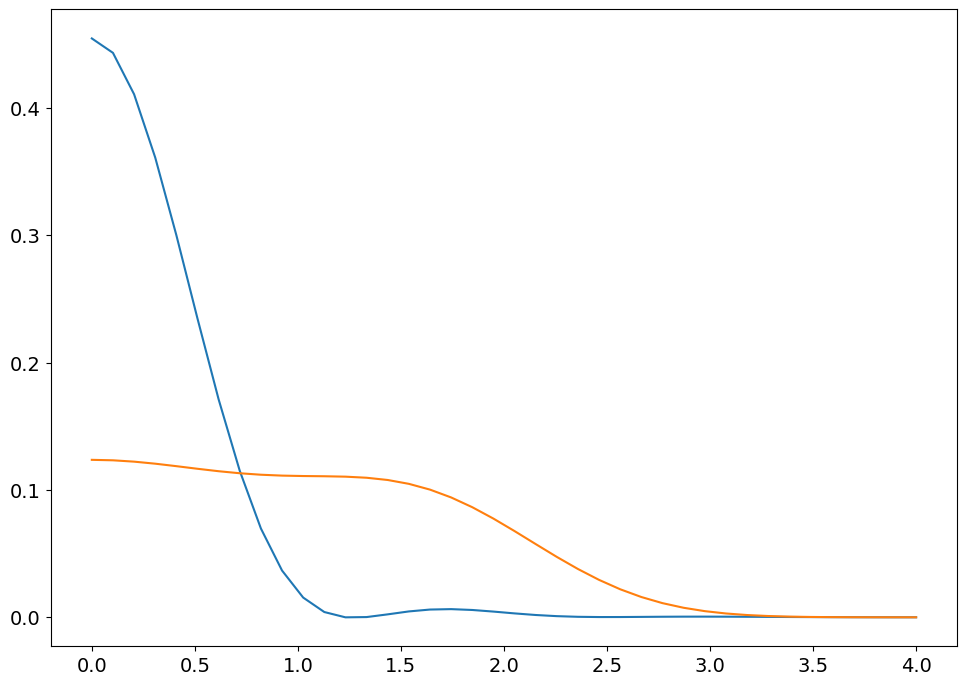

In [23]:
psi = psis[3]

prx0 = []
for x in xvec:
    prx0.append(quad(integrandy, 0, 3, args=(x))[0])
    print(x, "done")

plt.plot(xvec, prx0 )


pry0 = []
for y in xvec:
    pry0.append(quad(integrandx, 0, 3, args=(y))[0])
    print(y, "done")

plt.plot(xvec, pry0 )